In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
births = Table.read_table(path_data + 'baby.csv')

In [3]:
births.show(3)

In [4]:
ratios = births.select('Birth Weight', 'Gestational Days').with_columns(
    'Ratio BW:GD', births.column('Birth Weight')/births.column('Gestational Days')
)

In [5]:
ratios

Birth Weight | Gestational Days | Ratio BW:GD
120          | 284              | 0.422535
113          | 282              | 0.400709
128          | 279              | 0.458781
108          | 282              | 0.382979
136          | 286              | 0.475524
138          | 244              | 0.565574
132          | 245              | 0.538776
120          | 289              | 0.415225
143          | 299              | 0.478261
140          | 351              | 0.39886
... (1164 rows omitted)

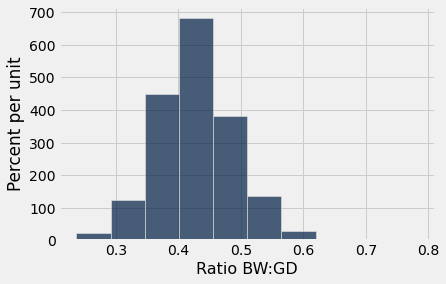

In [6]:
ratios.select('Ratio BW:GD').hist()

In [7]:
ratios.sort('Ratio BW:GD', descending=True).take(0)

Birth Weight | Gestational Days | Ratio BW:GD
116          | 148              | 0.783784

In [8]:
percentile(50, ratios.column(2))

0.42907801418439717

In [9]:
def one_bootstrap_median():
    resample = ratios.sample()
    return percentile(50, resample.column('Ratio BW:GD'))

In [10]:
one_bootstrap_median()

0.43010752688172044

In [11]:
# Generate medians from 5000 bootstrap samples
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

In [12]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([0.42545455, 0.43272727])

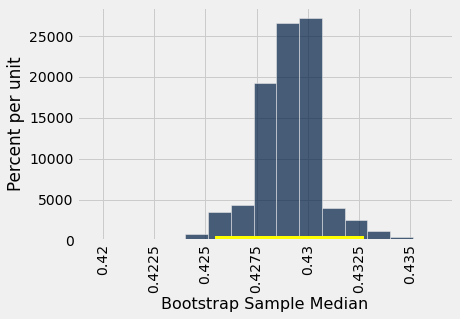

In [13]:
resampled_medians = Table().with_columns(
    'Bootstrap Sample Median', bstrap_medians
)
resampled_medians.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

In [14]:
births.select('Maternal Age').hist()

In [15]:
np.average(births.column('Maternal Age'))

27.228279386712096

In [16]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [17]:
# Generate means from 5000 bootstrap samples
num_repetitions = 5000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [18]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([26.90630324, 27.55962521])

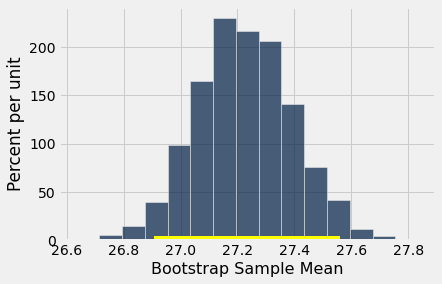

In [19]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

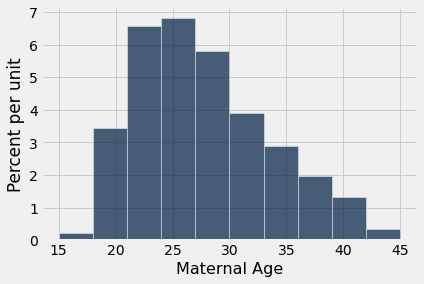

In [20]:
births.select('Maternal Age').hist()

In [21]:
left_80 = percentile(10, bstrap_means)
right_80 = percentile(90, bstrap_means)
make_array(left_80, right_80)

array([27.01277683, 27.44293015])

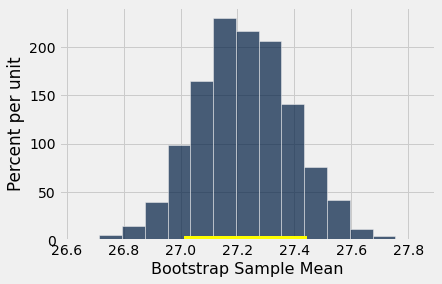

In [22]:
resampled_means.hist(bins=15)
plots.plot([left_80, right_80], [0, 0], color='yellow', lw=8);

In [23]:
births.where('Maternal Smoker', are.equal_to(True)).num_rows / births.num_rows

0.3909710391822828

In [24]:
smoking = births.column('Maternal Smoker')
np.count_nonzero(smoking) / len(smoking)

0.3909710391822828

In [25]:
def one_bootstrap_proportion():
    resample = births.sample()
    smoking = resample.column('Maternal Smoker')
    return np.count_nonzero(smoking) / len(smoking)

In [26]:
# Generate proportions from 5000 bootstrap samples
bstrap_proportions = make_array()
num_repetitions = 5000
for i in np.arange(num_repetitions):
    bstrap_proportions = np.append(bstrap_proportions, one_bootstrap_proportion())

In [27]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_proportions)
right = percentile(97.5, bstrap_proportions)

make_array(left, right)

array([0.36286201, 0.41908007])

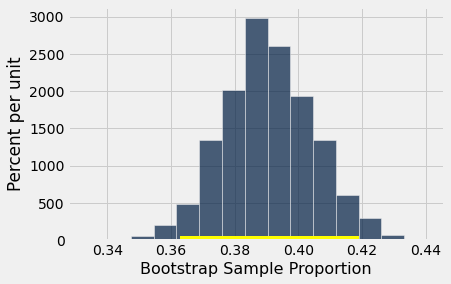

In [28]:
resampled_proportions = Table().with_columns(
    'Bootstrap Sample Proportion', bstrap_proportions
)
resampled_proportions.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);